In [112]:
import pandas as pd
import numpy as np

In [113]:
data=pd.read_csv("train.csv")

In [114]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,HighBP,HighChol,BMI,HvyAlcoholConsump,PhysActivity,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,1,1,40,0,0,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,0,0,25,0,1,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,1,1,28,0,0,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,1,0,27,0,1,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,1,1,24,0,1,True


DATA CLEANING AND SETTING

In [115]:
data['deck'] = data['Cabin'].str.split('/',expand=True)[0]
data['side'] = data['Cabin'].str.split('/',expand=True)[2]
data.drop(['Cabin','Name'],axis=1,inplace=True)
data['expend'] = data[['RoomService','FoodCourt','ShoppingMall','Spa','VRDeck']].sum(axis=1)

In [116]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HighBP,HighChol,BMI,HvyAlcoholConsump,PhysActivity,Transported,deck,side,expend
0,0001_01,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,1,1,40,0,0,False,B,P,0.0
1,0002_01,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,0,0,25,0,1,True,F,S,736.0
2,0003_01,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,1,1,28,0,0,False,A,S,10383.0
3,0003_02,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,1,0,27,0,1,False,A,S,5176.0
4,0004_01,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,1,1,24,0,1,True,F,S,1091.0


In [117]:
data['VIP'].unique()

array([False, True, nan], dtype=object)

FILL MISSING VALUES 

In [118]:
from sklearn.impute import KNNImputer

object_features = data.columns[data.dtypes=='object']
num_features = data.columns[data.dtypes!='object']

for feature in object_features:
    data[feature].fillna(data[feature].mode()[0],inplace=True)
       
imputer = KNNImputer(n_neighbors=50)
data[num_features] = imputer.fit_transform(data[num_features])

In [119]:
data.isnull().sum()
#CONVERT FALSE AND TRUE VALUES
data['VIP'].replace({False:0,True:1},inplace=True)
data['CryoSleep'].replace({False:0,True:1},inplace=True)
data.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HighBP,HighChol,BMI,HvyAlcoholConsump,PhysActivity,Transported,deck,side,expend
0,0001_01,Europa,0,TRAPPIST-1e,39.0,0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,40.0,0.0,0.0,0.0,B,P,0.0
1,0002_01,Earth,0,TRAPPIST-1e,24.0,0,109.0,9.0,25.0,549.0,44.0,0.0,0.0,25.0,0.0,1.0,1.0,F,S,736.0
2,0003_01,Europa,0,TRAPPIST-1e,58.0,1,43.0,3576.0,0.0,6715.0,49.0,1.0,1.0,28.0,0.0,0.0,0.0,A,S,10383.0
3,0003_02,Europa,0,TRAPPIST-1e,33.0,0,0.0,1283.0,371.0,3329.0,193.0,1.0,0.0,27.0,0.0,1.0,0.0,A,S,5176.0
4,0004_01,Earth,0,TRAPPIST-1e,16.0,0,303.0,70.0,151.0,565.0,2.0,1.0,1.0,24.0,0.0,1.0,1.0,F,S,1091.0


PLOTTING GRAPHS

In [120]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

<AxesSubplot:ylabel='Frequency'>

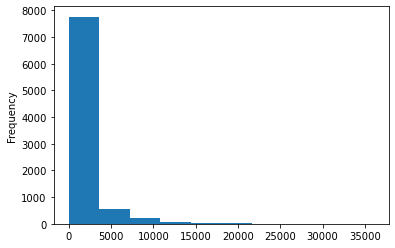

In [121]:
#HISTOGRAM FOR EXPENSES

#total expenses histogram
data['expend'].plot(kind='hist')


In [122]:
#composition of expenses

In [123]:
import seaborn as sns
import plotly.express as px

In [124]:
data.corr()

,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,HighBP,HighChol,BMI,HvyAlcoholConsump,PhysActivity,Transported,expend
CryoSleep,1.000000,-0.075764,-0.078281,-0.245999,-0.206869,-0.209603,-0.199602,-0.193577,0.007140,0.000507,0.010156,0.012030,-0.001125,0.460132,-0.376692
Age,-0.075764,1.000000,0.091867,0.070174,0.130229,0.034283,0.124819,0.102079,0.019715,0.001062,-0.006197,0.004407,0.002266,-0.076404,0.188545
VIP,-0.078281,0.091867,1.000000,0.057057,0.126011,0.018726,0.061208,0.123188,0.009076,0.028700,-0.003836,-0.019993,0.004955,-0.037261,0.162987
RoomService,-0.245999,0.070174,0.057057,1.000000,-0.013422,0.059167,0.011405,-0.016616,0.004348,-0.004243,0.015820,-0.018122,0.014959,-0.242060,0.237143
FoodCourt,-0.206869,0.130229,0.126011,-0.013422,1.000000,-0.011731,0.222477,0.227906,-0.002998,-0.008075,-0.017208,-0.011203,0.001359,0.044855,0.744168
ShoppingMall,-0.209603,0.034283,0.018726,0.059167,-0.011731,1.000000,0.015344,-0.006262,0.003185,-0.007111,0.005192,-0.004863,-0.002021,0.007919,0.222526
Spa,-0.199602,0.124819,0.061208,0.011405,0.222477,0.015344,1.000000,0.154485,0.000905,-0.007421,-0.018884,-0.002708,-0.003729,-0.219582,0.595289
VRDeck,-0.193577,0.102079,0.123188,-0.016616,0.227906,-0.006262,0.154485,1.000000,-0.012004,0.009251,-0.014655,0.018894,0.015240,-0.205301,0.586329
HighBP,0.007140,0.019715,0.009076,0.004348,-0.002998,0.003185,0.000905,-0.012004,1.000000,0.287801,0.234974,-0.005643,-0.128275,0.009955,-0.004516
HighChol,0.000507,0.001062,0.028700,-0.004243,-0.008075,-0.007111,-0.007421,0.009251,0.287801,1.000000,0.108960,-0.014607,-0.115641,0.017734,-0.006498


<AxesSubplot:>

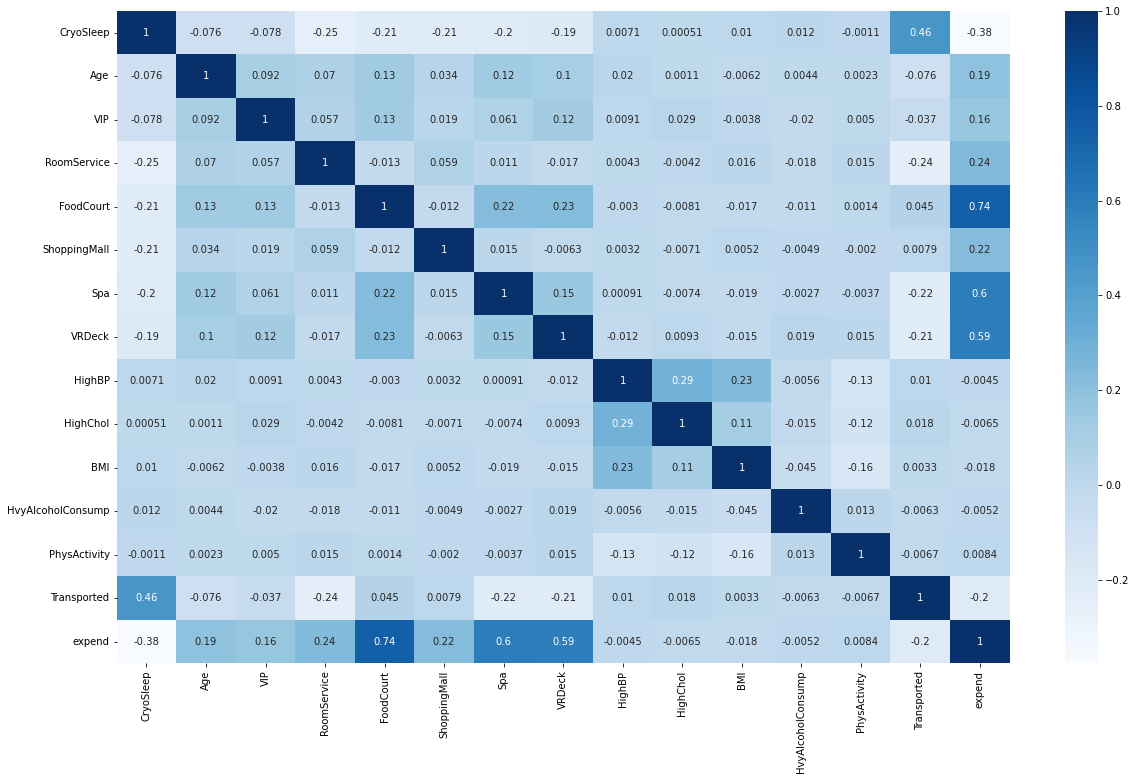

In [125]:
plt.figure(figsize=(20,12))
sns.heatmap(data.corr(),annot=True,cmap="Blues")

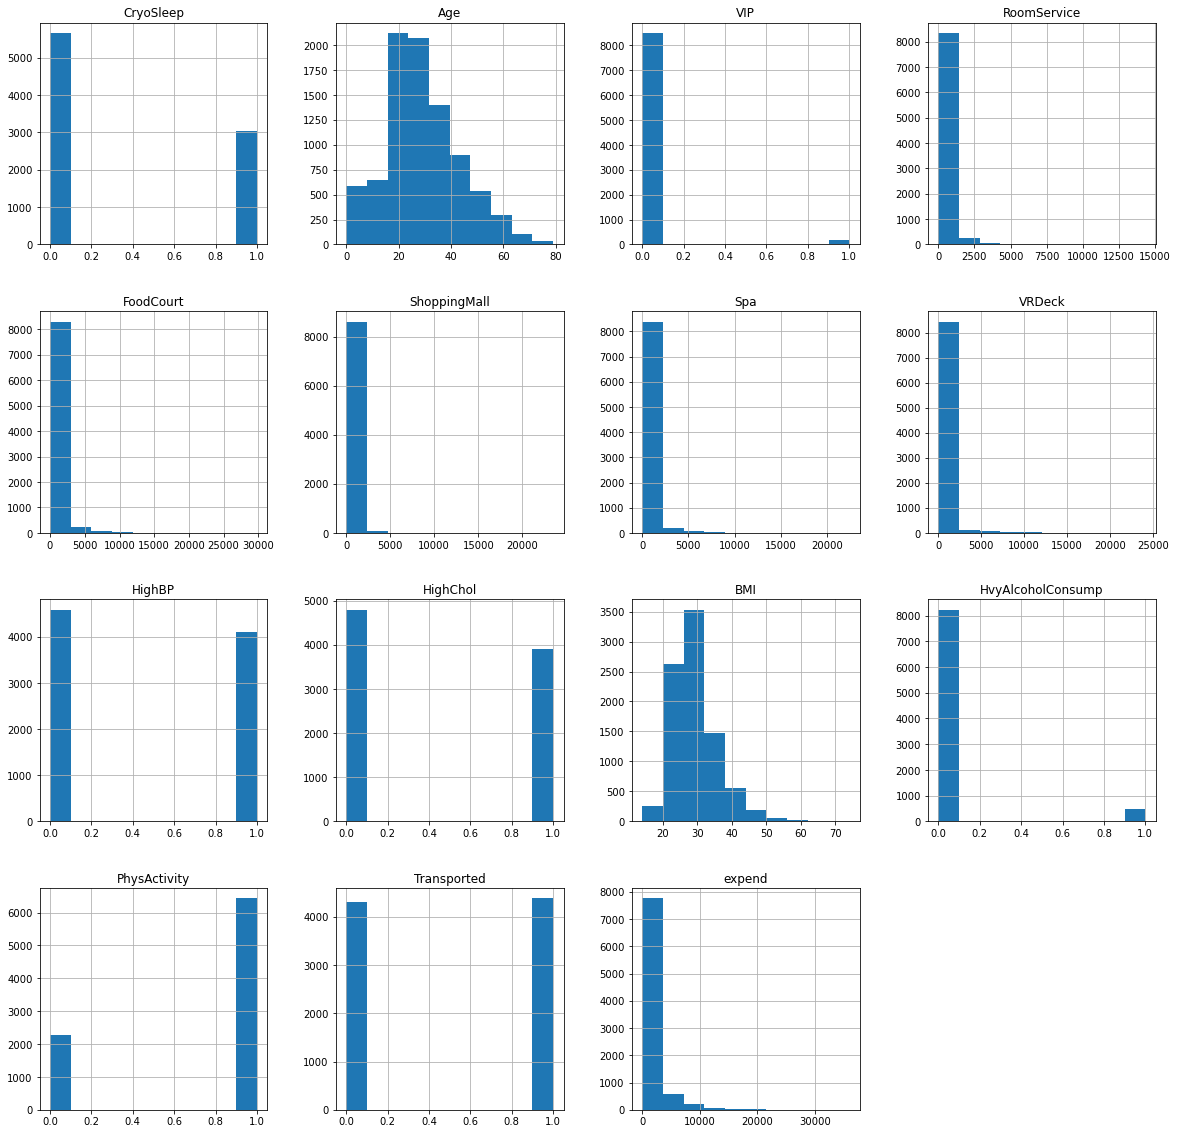

In [126]:
#we see the discrete columns and the continuous column age
data.hist(figsize=(20,20));

Text(0.5, 1.0, 'VIP composition')

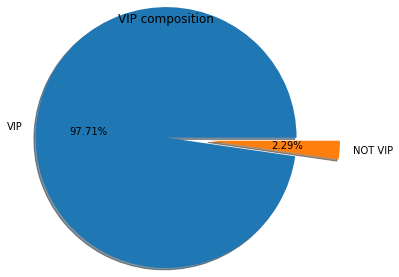

In [127]:
plt.pie(data["VIP"].value_counts(),labels=['VIP','NOT VIP'],radius=1.5,autopct = "%.2f%%",shadow=True,explode=(0,0.5));
plt.title("VIP composition")

Text(0.5, 1.0, 'sides')

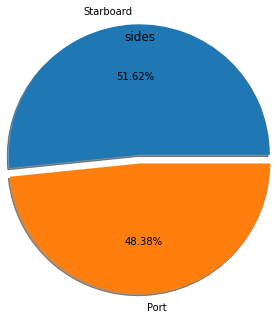

In [128]:
plt.pie(data["side"].value_counts(),labels=['Starboard','Port'],radius=1.5,autopct = "%.2f%%",shadow=True,explode=(0,0.1));
plt.title("sides")

In [129]:
data['deck'].unique()

array(['B', 'F', 'A', 'G', 'E', 'D', 'C', 'T'], dtype=object)

Text(0.5, 1.0, 'deck')

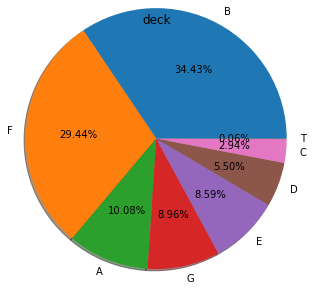

In [130]:
plt.pie(data["deck"].value_counts(),labels=data['deck'].unique(),radius=1.5,autopct = "%.2f%%",shadow=True);
plt.title("deck")

Text(0.5, 1.0, 'Alcohol consumption')

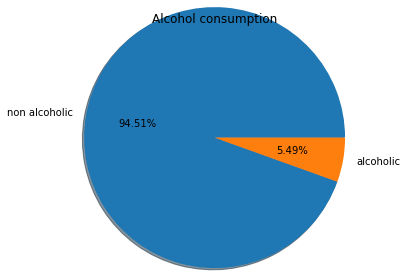

In [131]:
plt.pie(data["HvyAlcoholConsump"].value_counts(),labels=['non alcoholic','alcoholic'],radius=1.5,autopct = "%.2f%%",shadow=True);
plt.title("Alcohol consumption")

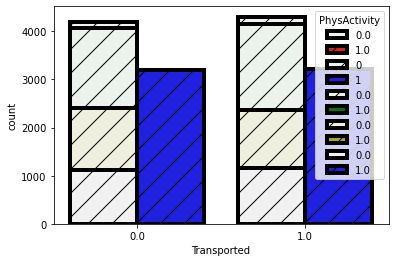

In [137]:
sns.countplot(x="Transported", data=data,hue="HighBP",lw=4,ec="black",hatch="/",color="r")
sns.countplot(x="Transported", data=data,hue="VIP",lw=4,ec="black",hatch="/",color="b")
sns.countplot(x="Transported", data=data,hue="HvyAlcoholConsump",lw=4,ec="black",hatch="/",color="g")
sns.countplot(x="Transported", data=data,hue="HighChol",lw=4,ec="black",hatch="/",color="y")
sns.countplot(x="Transported", data=data,hue="PhysActivity",lw=4,ec="black",hatch="/",color="b")

<AxesSubplot:xlabel='Transported', ylabel='count'>

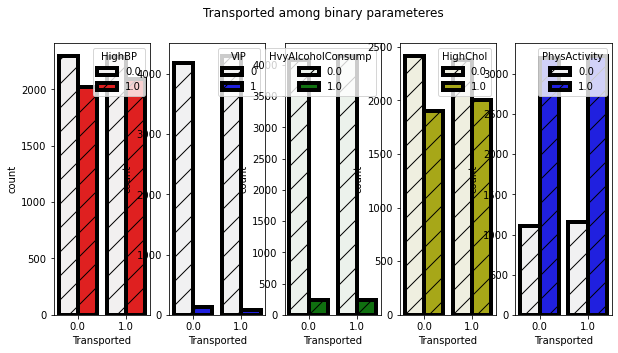

In [149]:
fig, axes = plt.subplots(1, 5, figsize=(10, 5))
fig.suptitle('Transported among binary parameteres')
sns.countplot(ax=axes[0],x="Transported", data=data,hue="HighBP",lw=4,ec="black",hatch="/",color="r")
sns.countplot(ax=axes[1],x="Transported", data=data,hue="VIP",lw=4,ec="black",hatch="/",color="b")
sns.countplot(ax=axes[2],x="Transported", data=data,hue="HvyAlcoholConsump",lw=4,ec="black",hatch="/",color="g")
sns.countplot(ax=axes[3],x="Transported", data=data,hue="HighChol",lw=4,ec="black",hatch="/",color="y")
sns.countplot(ax=axes[4],x="Transported", data=data,hue="PhysActivity",lw=4,ec="black",hatch="/",color="b")